In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df3=pd.read_csv(r'/content/drive/MyDrive/risks03.csv',encoding="utf-8")

In [ ]:
df2=pd.read_csv(r'/content/drive/MyDrive/risks02.csv',encoding="utf-8")

In [ ]:
df1=pd.read_csv(r'/content/drive/MyDrive/risks01.csv',encoding="utf-8")

In [ ]:
df = pd.concat([df1, df2, df3], axis=0, join='inner')

In [ ]:
df.shape

In [5]:
#removing the non str values prior to the creation of embeddings
lis1a=df3['10k_risks1A']
lis1aa=[]
for i in lis1a:
    if(type(i)==str):
        lis1aa.append(i)
print(len(lis1aa))
lis1aa=lis1aa[10000:]  #number of observations to be tested

17900


In [ ]:
#create another list named lis1aa which is a breakdown of the risks/each observation of lis1aa into paragraphs.

In [59]:
print(df3['10k_risks1A'][1])
#data cleaning
#

#'##TABLE_START &#160; &#149; &#160;' ##TABLE_END &#160;' #remove this

#'&#160;' #separator

 Item 1A. Risk Factors ##TABLE_END Our business, financial condition and results of operations are subject to various risks, including those described below, which in turn may affect the value of our securities. In addition, other risks not presently known to us or that we currently believe to be immaterial may also adversely affect our business, financial condition, results of operations, cash flows or prospects, perhaps materially. The risks discussed below also include forward-looking statements, and actual results and events may differ substantially from those discussed or highlighted in these forward-looking statements. Before making an investment decision with respect to any of our securities, you should carefully consider the following risks and uncertainties described below and elsewhere in this report. See also &#147;Cautionary Note Regarding Forward-Looking Statements.&#148; 

Risks Related to our Business and our Industry 

The market for alternative fuel spark-ignited power

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [39]:
stop=list('companys company future factors required tablestart tableend able obtain additional us unable would newcompany will value information years upon company’s fiscal rate based report sales management services form costs related tax ended certain market credit products amount period net including operations securities cash time statements income section common assets shares business plan year date interest december agreement stock may financial million shall also result could results significant including tableendtablestart'.split(" "))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
stop_words = set(stopwords.words("english")+stop)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
def preprocess(doc):
    stop_words = set(stopwords.words("english")+stop)
    ps = PorterStemmer()
    words = word_tokenize(doc.lower())  # Tokenize and convert to lowercase
    #words = [ps.stem(word) for word in words if word.isalpha()]  # Stem words and remove non-alphabetic characters
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

#function to perform all the cleaning
import re
def cleanText(text):
    text = re.sub("https?:\/\/.*[\r\n]*", "", text)
    text = re.sub("@\S+", "", text)
    text = re.sub("#", "", text)
    text = text.replace('\n',"")
    text = re.sub(r'[^a-zA-Z ]+',"",text)
    text = text.lower()
    text = text.strip()
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:12: DeprecationWarning: invalid escape sequence '\/'
<>:13: DeprecationWarning: invalid escape sequence '\S'
<>:12: DeprecationWarning: invalid escape sequence '\/'
<>:13: DeprecationWarning: invalid escape sequence '\S'
<ipython-input-41-955c905d32a2>:12: DeprecationWarning: invalid escape sequence '\/'
  text = re.sub("https?:\/\/.*[\r\n]*", "", text)
<ipython-input-41-955c905d32a2>:13: DeprecationWarning: invalid escape sequence '\S'
  text = re.sub("@\S+", "", text)


In [42]:
#cleaning all the risks in the list lis1aa
clean_list=[cleanText(i) for i in lis1aa]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
len(clean_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7900

In [44]:
processed_text_mini= [preprocess(l) for l in clean_list]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
#!pip install pyldavis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
from gensim.corpora import Dictionary

documents = processed_text_mini  # Your list of preprocessed documents

dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
from gensim.models import LdaModel

num_topics = 20  # You can adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
topics = lda_model.print_topics(num_words=20)  # Print the top 10 words for each topic
for topic in topics:
    print(topic)

(0, '0.012*"investment" + 0.010*"properties" + 0.009*"investments" + 0.009*"stockholders" + 0.009*"real" + 0.008*"property" + 0.008*"distributions" + 0.007*"ability" + 0.007*"debt" + 0.007*"reit" + 0.007*"estate" + 0.006*"subject" + 0.006*"make" + 0.005*"capital" + 0.005*"affect" + 0.005*"portfolio" + 0.005*"underlying" + 0.005*"adversely" + 0.004*"rates" + 0.004*"available"')
(1, '0.029*"product" + 0.020*"clinical" + 0.013*"candidates" + 0.012*"regulatory" + 0.012*"trials" + 0.011*"development" + 0.011*"approval" + 0.007*"marketing" + 0.007*"fda" + 0.006*"ability" + 0.006*"patent" + 0.006*"third" + 0.006*"develop" + 0.005*"research" + 0.005*"candidate" + 0.005*"rights" + 0.004*"drug" + 0.004*"subject" + 0.004*"parties" + 0.004*"trial"')
(2, '0.016*"intellectual" + 0.016*"property" + 0.014*"rights" + 0.013*"patent" + 0.010*"patents" + 0.009*"ability" + 0.008*"technology" + 0.007*"price" + 0.007*"litigation" + 0.006*"technologies" + 0.006*"proprietary" + 0.006*"development" + 0.006*"dev

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
topic_assignments = [lda_model[doc] for doc in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
#prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
#pyLDAvis.display(prepared_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


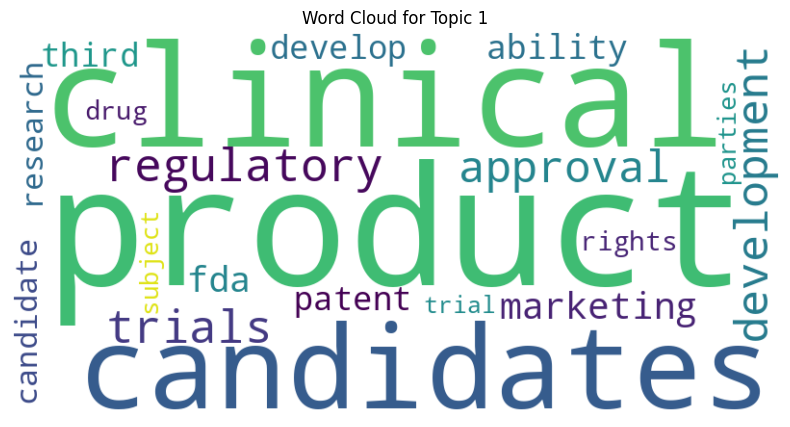

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


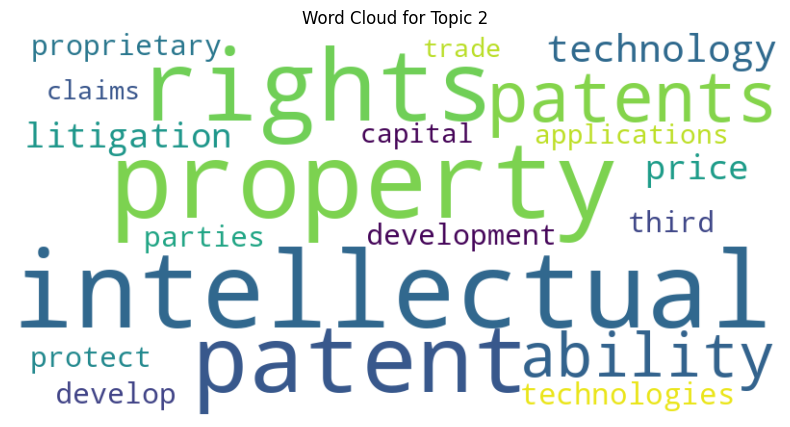

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


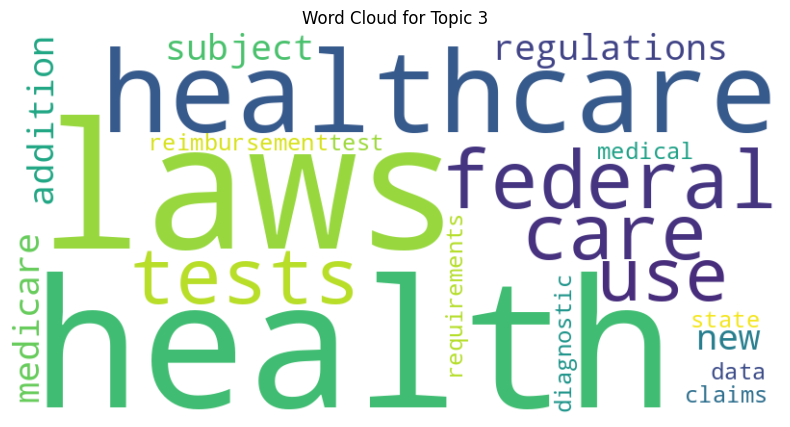

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


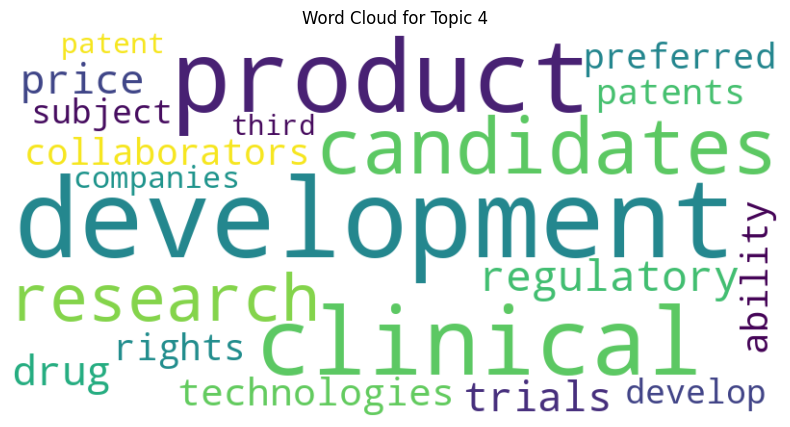

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


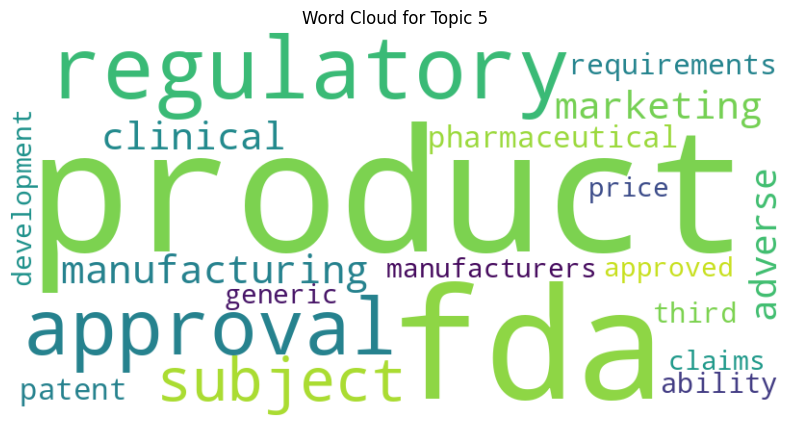

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


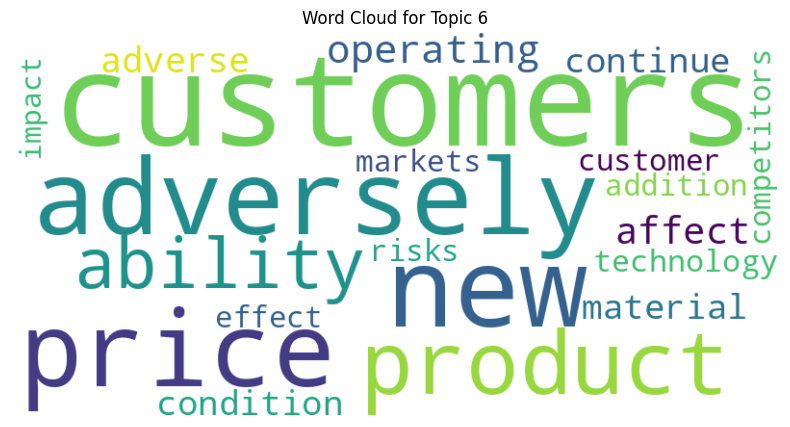

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


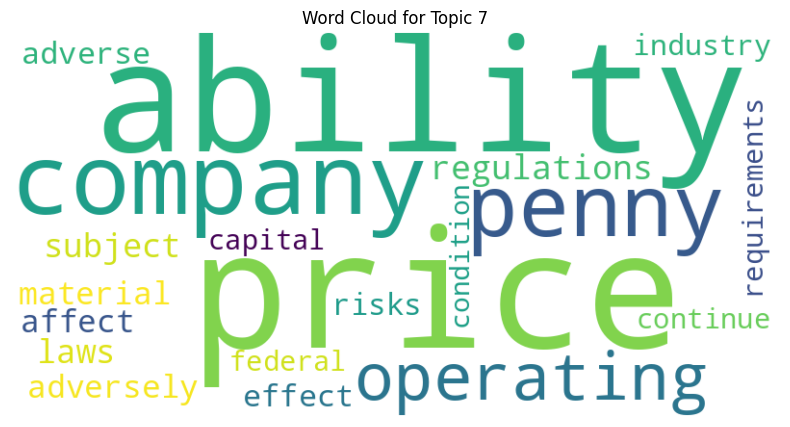

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


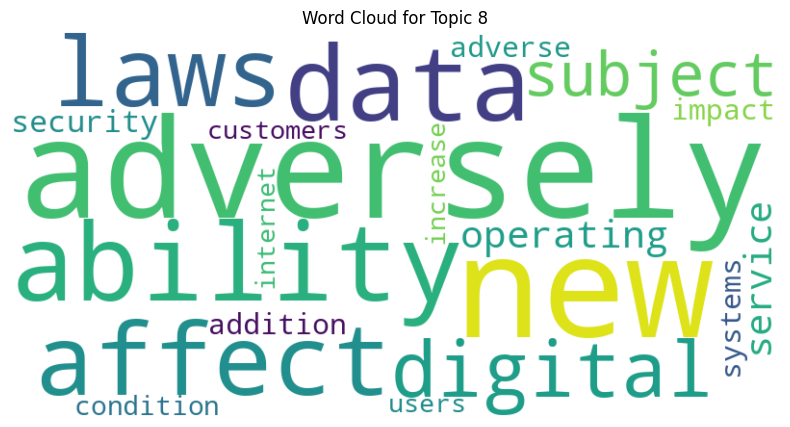

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


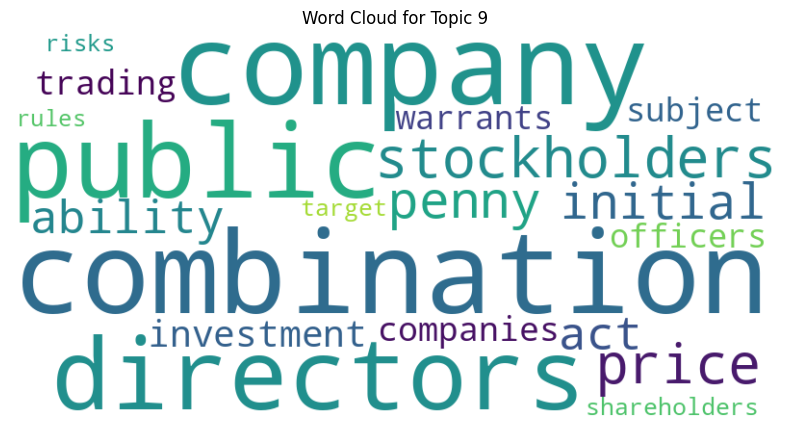

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


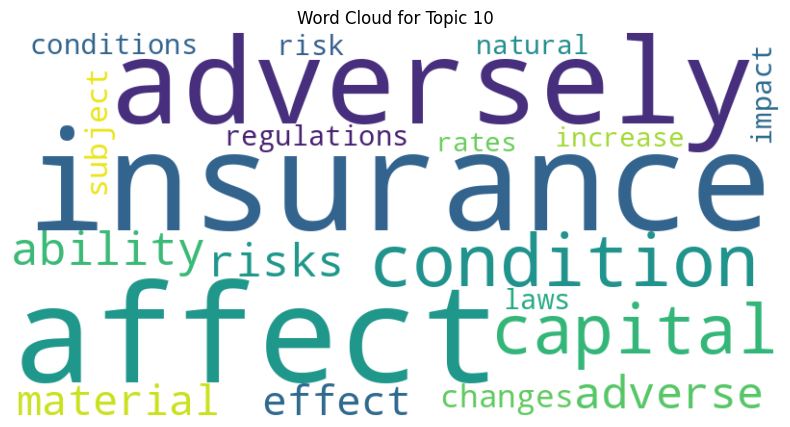

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


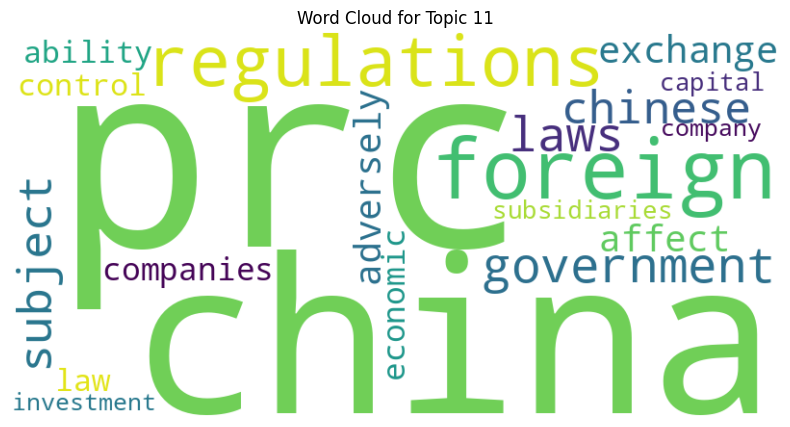

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


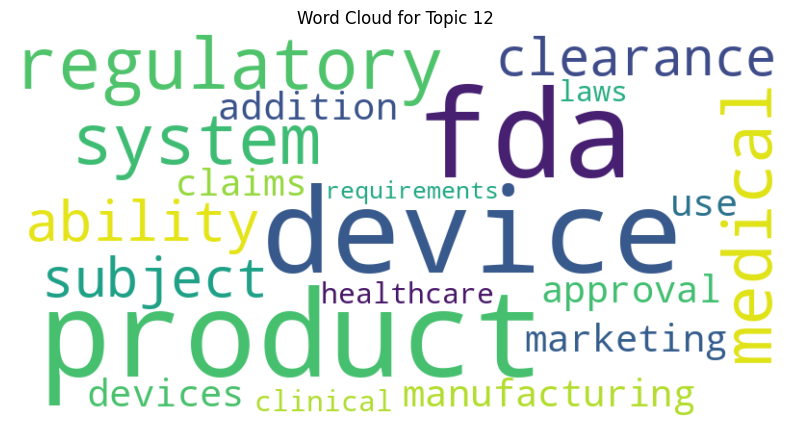

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


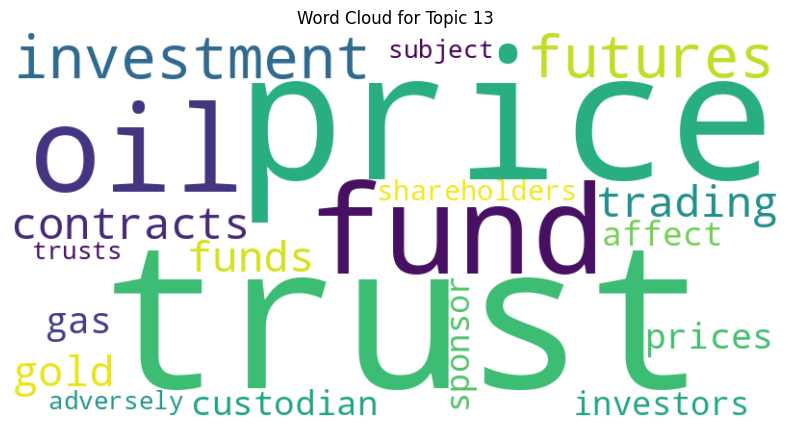

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


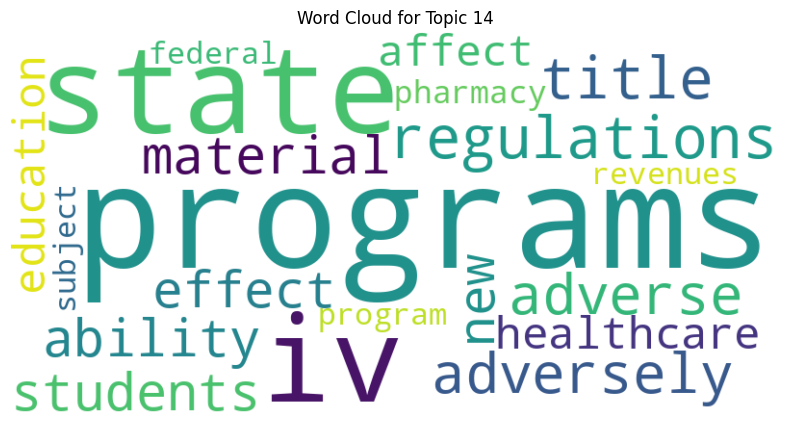

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


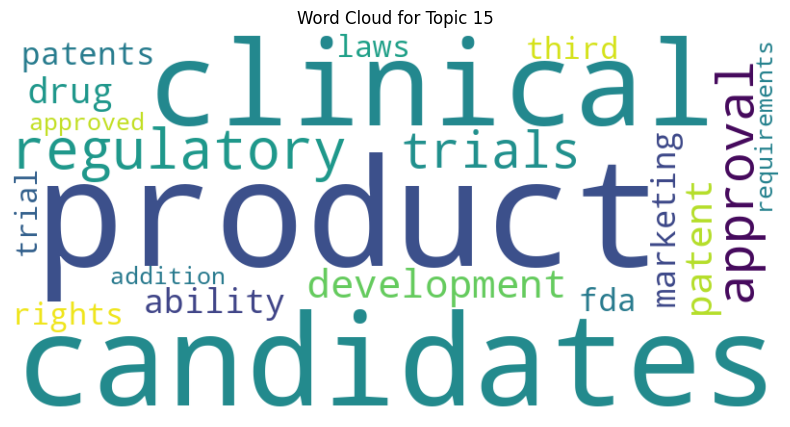

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


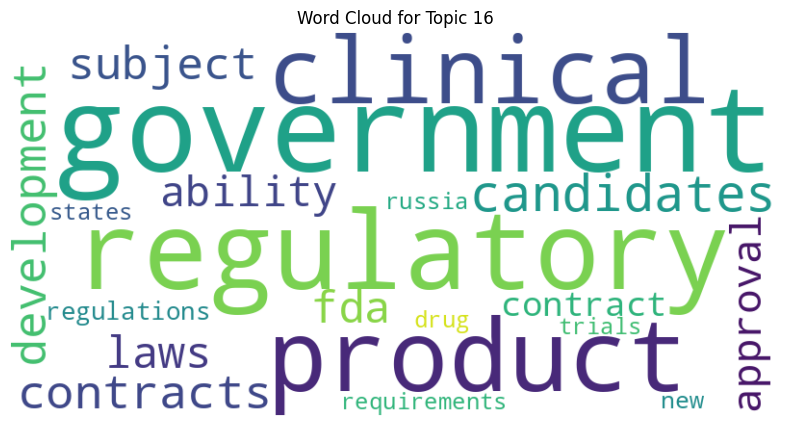

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


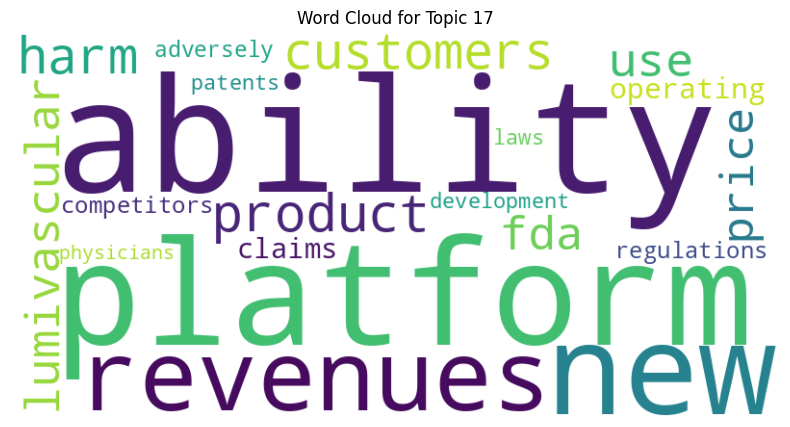

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


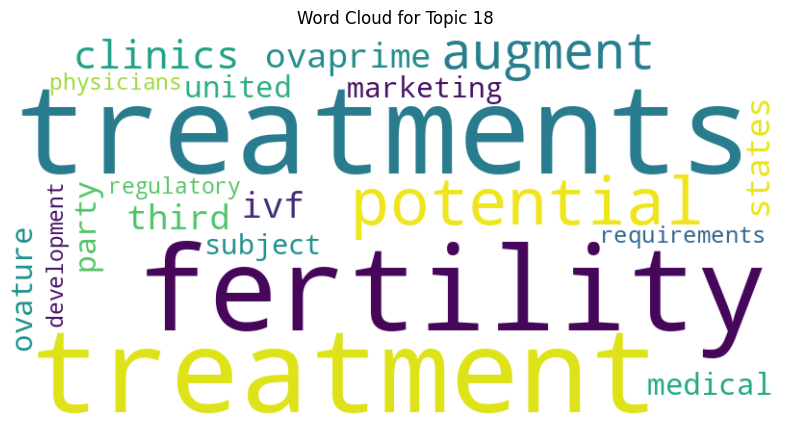

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


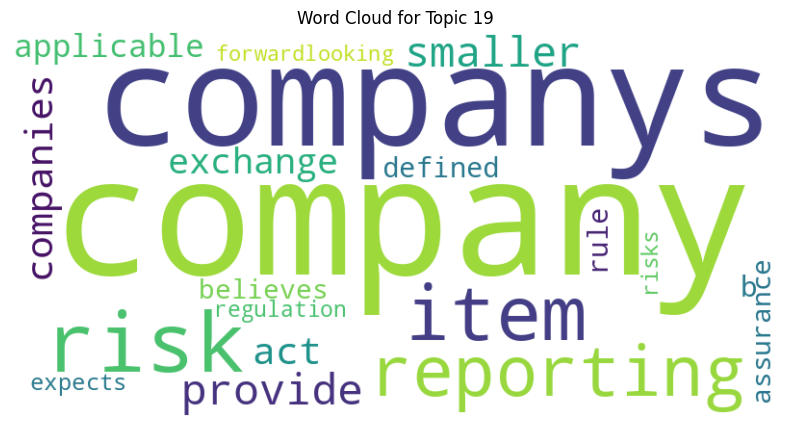

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Replace these with your LDA model and dictionary
lda_model = lda_model
dictionary = dictionary

# Define a function to generate and display a word cloud for a given topic
def generate_wordcloud_for_topic(topic_id, lda_model, dictionary):
    words = lda_model.show_topic(topic_id, topn=20)  # Adjust topn as needed
    word_freq = {word: prob for word, prob in words}

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white')

    # Generate the word cloud from the word frequency dictionary
    wordcloud.generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Topic {topic_id}")
    plt.axis("off")
    plt.show()

# Iterate over topics and generate word clouds for each
num_topics = lda_model.num_topics
for topic_id in range(1,num_topics):
    generate_wordcloud_for_topic(topic_id, lda_model, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cm

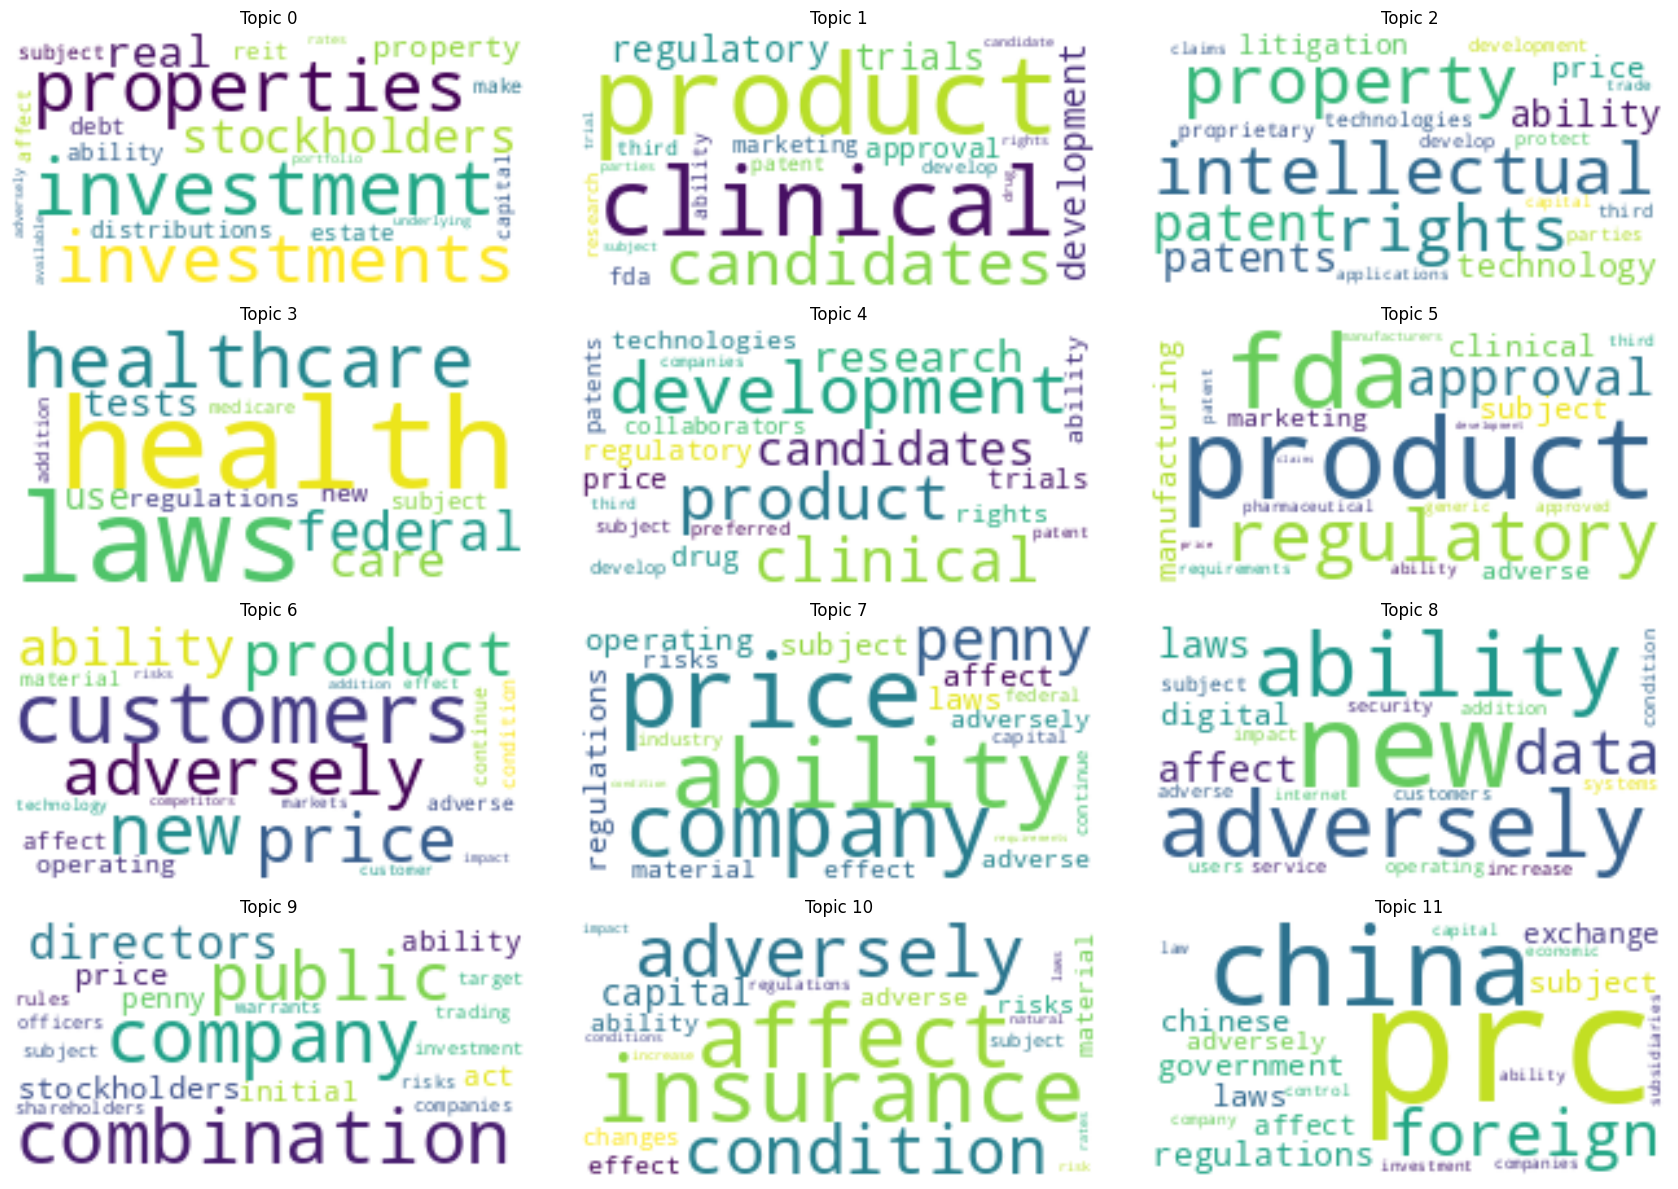

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.ticker import MaxNLocator

# Replace these with your LDA model and dictionary
lda_model = lda_model
dictionary = dictionary

# Define a function to generate and display a word cloud for a given topic
def generate_wordcloud_for_topic(topic_id, lda_model, dictionary, ax):
    words = lda_model.show_topic(topic_id, topn=20)  # Adjust topn as needed
    word_freq = {word: prob for word, prob in words}

    # Create a WordCloud object
    wordcloud = WordCloud(width=200, height=100, background_color='white', margin=2)

    # Generate the word cloud from the word frequency dictionary
    wordcloud.generate_from_frequencies(word_freq)

    # Plot the word cloud on the specified axis
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Topic {topic_id}")
    ax.axis("off")

# Create a 4x6 grid of subplots for 24 topics
num_rows, num_cols = 4, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

# Iterate over topics and generate word clouds for each
num_topics = lda_model.num_topics
for topic_id, ax in enumerate(axes.flat):
    if topic_id < num_topics:
        generate_wordcloud_for_topic(topic_id, lda_model, dictionary, ax)
    else:
        ax.axis('off')  # Turn off empty subplots if there are fewer than 24 topics

# Remove any remaining empty subplots
for i in range(num_topics, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Ensure x and y axis labels are not displayed
for ax in axes.flatten():
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

plt.tight_layout()
plt.show()
